In [462]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [463]:
df = pd.read_csv("../data/dataset_final.csv")
df = df.rename(columns={'Unnamed: 0' : 'date'})
df.head()

,date,Y_Aave_APY,X_Aave_Utilization,totalValueLockedUSD,Y_SOFR,X_USDC_Depeg_Risk,X_BTC_Price,X_ETH_Price,X_VIX,X_DGS2,X_Gas_Price_Gwei,Y_Target_Spread,X_ETH_Returns,X_ETH_Vol_7D,X_BTC_Returns,X_BTC_Vol_7D,X_Gas_MA_7D,X_VIX_Pct_Change
0,2023-02-03,1.787551,0.668511,1.607209e+07,4.55,0.386207,23426.40,1663.67,18.33,4.30,33.686520,-2.762449,0.011091,0.083008,-0.005205,0.061984,27.292499,-0.021356
1,2023-02-04,1.888926,0.687208,1.765850e+07,4.55,0.373452,23318.95,1665.36,18.33,4.30,26.322246,-2.661074,0.001016,0.079483,-0.004587,0.062278,28.365183,0.000000
2,2023-02-05,2.518026,0.793438,1.839142e+07,4.55,0.415779,22938.03,1629.63,18.33,4.30,23.794847,-2.031974,-0.021455,0.071024,-0.016335,0.054399,28.459341,0.000000
3,2023-02-06,1.787604,0.668528,2.093404e+07,4.55,0.351516,22751.79,1613.52,19.43,4.44,28.478692,-2.762396,-0.009886,0.048659,-0.008119,0.039010,29.409754,0.060011
4,2023-02-07,1.972380,0.702233,2.167537e+07,4.55,0.346042,23260.42,1672.78,18.66,4.47,36.817070,-2.577620,0.036727,0.058386,0.022356,0.043533,30.348589,-0.039629


In [464]:
df.describe()

,Y_Aave_APY,X_Aave_Utilization,totalValueLockedUSD,Y_SOFR,X_USDC_Depeg_Risk,X_BTC_Price,X_ETH_Price,X_VIX,X_DGS2,X_Gas_Price_Gwei,Y_Target_Spread,X_ETH_Returns,X_ETH_Vol_7D,X_BTC_Returns,X_BTC_Vol_7D,X_Gas_MA_7D,X_VIX_Pct_Change
count,1009.000000,1009.000000,1.009000e+03,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,6.576359,0.830712,1.699402e+09,4.862775,0.341511,65648.868087,2652.516501,16.975302,4.298702,19.656079,1.713584,0.001283,0.079081,0.001764,0.059326,19.732629,0.002109
std,8.168635,0.098686,1.599031e+09,0.445601,0.080815,31597.064825,843.904041,4.383961,0.463258,19.475874,8.169541,0.033492,0.040269,0.024684,0.027796,18.145499,0.067664
min,0.321688,0.283590,1.607209e+07,3.910000,0.122873,20227.020000,1431.960000,11.860000,3.410000,0.859087,-4.228312,-0.147261,0.007988,-0.085974,0.008982,1.064860,-0.357539
25%,2.878563,0.780552,3.243815e+08,4.360000,0.283733,30493.720000,1866.860000,13.920000,3.920000,4.159665,-1.739575,-0.015107,0.053644,-0.010646,0.038311,4.259906,-0.021642
50%,4.232488,0.859554,1.419557e+09,5.050000,0.363559,63840.000000,2513.350000,16.150000,4.280000,14.594282,-0.366943,0.000402,0.071780,0.000380,0.055002,15.227804,0.000000
75%,6.923592,0.904199,2.556974e+09,5.310000,0.403689,96534.960000,3330.860000,18.610000,4.710000,29.019408,1.690907,0.016056,0.093559,0.013097,0.073195,29.409754,0.014327
max,57.066085,0.997449,6.166584e+09,5.400000,0.501479,124720.090000,4831.240000,52.330000,5.190000,155.844447,52.446085,0.218478,0.234211,0.118759,0.174266,125.560442,0.740391


# Plotando o Target - Spread de Risco 

[]

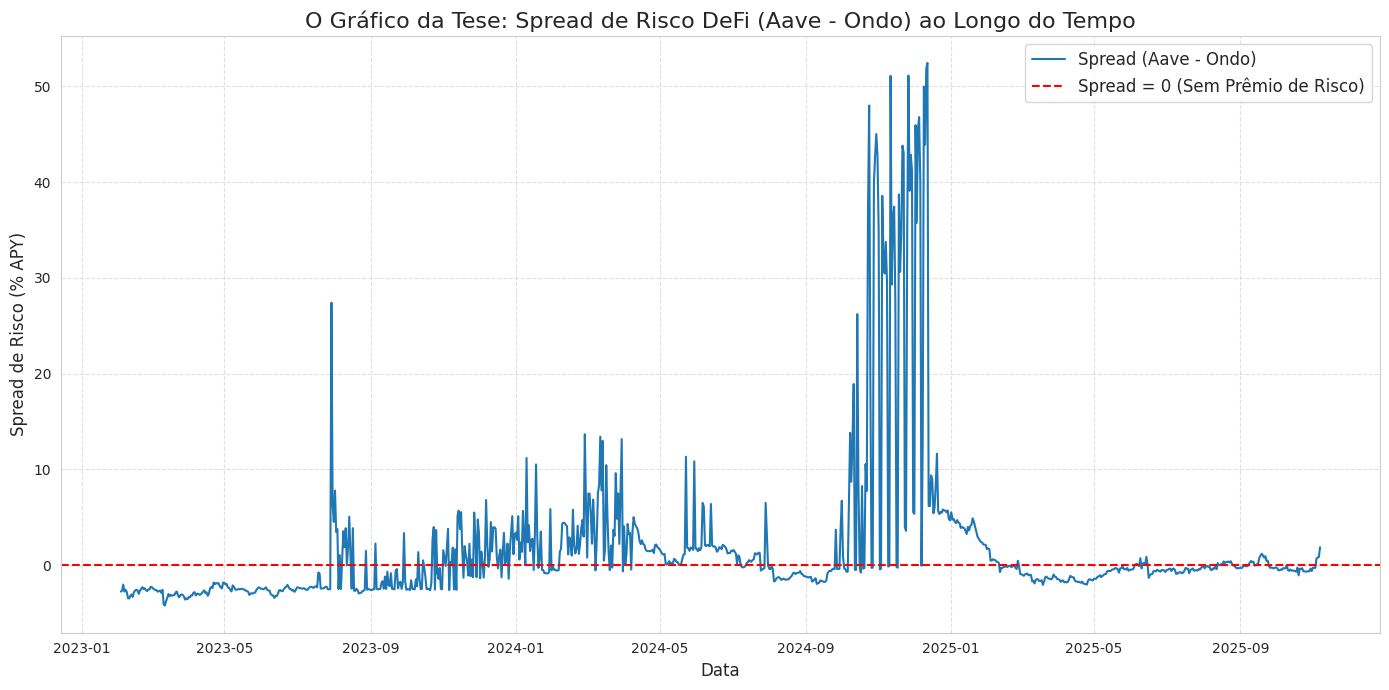

In [465]:
# --- 2. Preparar os Dados ---
# Converter a coluna 'date' de string para datetime e defini-la como índice
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# --- 3. Gerar "O Gráfico da Tese" (Plot de Série Temporal) ---
plt.figure(figsize=(14, 7))
ax = sns.lineplot(x=df.index, y=df['Y_Target_Spread'], label='Spread (Aave - Ondo)')

# Adicionar uma linha de base em 0
ax.axhline(0, ls='--', color='red', lw=1.5, label='Spread = 0 (Sem Prêmio de Risco)')

# Melhorar a formatação
plt.title('O Gráfico da Tese: Spread de Risco DeFi (Aave - Ondo) ao Longo do Tempo', fontsize=16)
plt.ylabel('Spread de Risco (% APY)', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Plotar o gráfico
plt.plot()

In [466]:
df['Y_Target_Diff'] = df['Y_Target_Spread'].diff()
df['Lag_1'] = df['Y_Target_Spread'].shift(1)
df['Lag_2'] = df['Y_Target_Spread'].shift(2)
df['Diff_Lag_1'] = df['Y_Target_Diff'].shift(1)

# --- APLICANDO SUGESTÃO 2: Transformações ---
df['X_BTC_Ret'] = df['X_BTC_Price'].pct_change()
df['X_Gas_Change'] = df['X_Gas_Price_Gwei'].diff()

df = df.dropna()

In [467]:
# Seleção de Features (Novas features engenheiradas)
features = [
    'X_Aave_Utilization', 'totalValueLockedUSD', 'X_USDC_Depeg_Risk', 'X_VIX',
    'X_BTC_Vol_7D', 'X_ETH_Vol_7D', 'X_ETH_Returns', 'X_DGS2',
    'Lag_1', 'Lag_2', 'Diff_Lag_1', 'X_BTC_Ret', 'X_Gas_Change'
]

features_sem = [
    'totalValueLockedUSD', 'X_USDC_Depeg_Risk', 'X_VIX',
    'X_BTC_Vol_7D', 'X_ETH_Vol_7D', 'X_ETH_Returns', 'X_DGS2',
    'Lag_1', 'Lag_2', 'Diff_Lag_1', 'X_BTC_Ret', 'X_Gas_Change'
]

X = df[features]
Y = df['Y_Target_Diff']
#Y = df['Y_Target_Spread']

# NUNCA usar shuffle=True em séries temporais
split_point = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
Y_train, Y_test = Y.iloc[:split_point], Y.iloc[split_point:]

print(f"--- Divisão dos Dados (Time Series Split) ---")
print(f"Total de amostras: {len(df)}")
print(f"Amostras de Treino: {len(Y_train)} (80%)")
print(f"Amostras de Teste:  {len(Y_test)} (20%)")

--- Divisão dos Dados (Time Series Split) ---
Total de amostras: 1007
Amostras de Treino: 805 (80%)
Amostras de Teste:  202 (20%)


In [468]:
df.head()

,Y_Aave_APY,X_Aave_Utilization,totalValueLockedUSD,Y_SOFR,X_USDC_Depeg_Risk,X_BTC_Price,X_ETH_Price,X_VIX,X_DGS2,X_Gas_Price_Gwei,...,X_BTC_Returns,X_BTC_Vol_7D,X_Gas_MA_7D,X_VIX_Pct_Change,Y_Target_Diff,Lag_1,Lag_2,Diff_Lag_1,X_BTC_Ret,X_Gas_Change
date,,,,,,,,,,,,,,,,,,,,,
2023-02-05,2.518026,0.793438,1.839142e+07,4.55,0.415779,22938.03,1629.63,18.33,4.30,23.794847,...,-0.016335,0.054399,28.459341,0.000000,0.629101,-2.661074,-2.762449,0.101375,-0.016335,-2.527400
2023-02-06,1.787604,0.668528,2.093404e+07,4.55,0.351516,22751.79,1613.52,19.43,4.44,28.478692,...,-0.008119,0.039010,29.409754,0.060011,-0.730422,-2.031974,-2.661074,0.629101,-0.008119,4.683845
2023-02-07,1.972380,0.702233,2.167537e+07,4.55,0.346042,23260.42,1672.78,18.66,4.47,36.817070,...,0.022356,0.043533,30.348589,-0.039629,0.184776,-2.762396,-2.031974,-0.730422,0.022356,8.338378
2023-02-08,1.734510,0.658529,2.368092e+07,4.55,0.369420,22973.38,1650.96,19.63,4.45,38.656256,...,-0.012340,0.033272,31.449329,0.051983,-0.237871,-2.577620,-2.762396,0.184776,-0.012340,1.839186
2023-02-09,1.084274,0.520642,2.732104e+07,4.55,0.380960,21804.16,1545.33,20.71,4.48,40.353819,...,-0.050895,0.057327,32.587064,0.055018,-0.650236,-2.815490,-2.577620,-0.237871,-0.050895,1.697563


In [469]:
from sklearn.preprocessing import StandardScaler

In [470]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, 
                                columns=X_train.columns, 
                                index=X_train.index)

X_test = pd.DataFrame(X_test_scaled, 
                               columns=X_test.columns, 
                               index=X_test.index)

# Feature Selection

In [471]:
from sklearn.ensemble import RandomForestRegressor

In [472]:
# --- 5. Método Embutido (Embedded): Random Forest Importance ---
# Modelos de Árvore (como Random Forest) calculam a importância de cada feature.
# Vantagem: Robusto, captura relações não-lineares, não exige scaling.

print("--- Método Embutido (Random Forest Importance) ---")
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo (pode usar dados não-escalados)
RF.fit(X_train, Y_train)

# Obter as importâncias
importances = RF.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Importância das features (Random Forest):")
print(importance_df)

# Você pode então selecionar as "N" features com maior importância
# Por exemplo, as 8 melhores
selected_features_rf = importance_df.head(12)['feature'].to_list()
print(f"\nFeatures selecionadas (Embedded/RF): {selected_features_rf}")

# Aplicar a seleção
X_train = X_train[selected_features_rf]
X_test = X_test[selected_features_rf]

--- Método Embutido (Random Forest Importance) ---
Importância das features (Random Forest):
                feature  importance
0    X_Aave_Utilization    0.443868
8                 Lag_1    0.391446
9                 Lag_2    0.057557
10           Diff_Lag_1    0.035390
1   totalValueLockedUSD    0.016754
12         X_Gas_Change    0.009915
5          X_ETH_Vol_7D    0.008291
2     X_USDC_Depeg_Risk    0.007424
11            X_BTC_Ret    0.006915
4          X_BTC_Vol_7D    0.006894
6         X_ETH_Returns    0.006376
3                 X_VIX    0.004805
7                X_DGS2    0.004366

Features selecionadas (Embedded/RF): ['X_Aave_Utilization', 'Lag_1', 'Lag_2', 'Diff_Lag_1', 'totalValueLockedUSD', 'X_Gas_Change', 'X_ETH_Vol_7D', 'X_USDC_Depeg_Risk', 'X_BTC_Ret', 'X_BTC_Vol_7D', 'X_ETH_Returns', 'X_VIX']


# Treinamento

In [473]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [474]:
results = {}

# --- 4. Modelo 1: Baseline (O "Ingênuo") ---
# A previsão de "hoje" é o valor de "ontem".
y_pred_baseline = Y_test.shift(1)
# O primeiro valor do teste não tem "ontem", então usamos o último valor do treino.
y_pred_baseline.iloc[0] = Y_train.iloc[-1]

# Calcular Erros
mae_baseline = mean_absolute_error(Y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(Y_test, y_pred_baseline))
results['Baseline'] = {'MAE': mae_baseline, 'RMSE': rmse_baseline}


In [475]:
# --- 5. Modelo 2: Regressão Linear (O "Explicador") ---
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
y_pred_lr = model_lr.predict(X_test)

# Calcular Erros
mae_lr = mean_absolute_error(Y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(Y_test, y_pred_lr))
results['Linear Regression'] = {'MAE': mae_lr, 'RMSE': rmse_lr}


In [476]:

# --- 6. Modelo 3: XGBoost (O "Trator") ---
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
model_xgb.fit(X_train, Y_train)
y_pred_xgb = model_xgb.predict(X_test)

# Calcular Erros
mae_xgb = mean_absolute_error(Y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(Y_test, y_pred_xgb))
results['XGBoost'] = {'MAE': mae_xgb, 'RMSE': rmse_xgb}


In [477]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(X_train, Y_train)
y_pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf))
results['RandomForest'] = {'MAE': mae_rf, 'RMSE': rmse_rf}

In [478]:

# --- 7. Comparar Resultados ---
print("--- Comparação de Performance dos Modelos (Erro) ---")
print("(Quanto menor o erro, melhor o modelo)\n")

df_results = pd.DataFrame(results).T
df_results['Performance (vs Baseline)'] = ((df_results['RMSE'] / rmse_baseline) - 1) * 100
print(df_results.to_markdown(floatfmt=".6f"))
print("\n")

# --- 8. Extrair Coeficientes da Regressão Linear ---
print("--- Coeficientes do Modelo 2 (Regressão Linear) ---")
print("O 'Explicador': O quanto o Spread (Y) muda para cada 1 unidade de X\n")
# Criar um DataFrame para os coeficientes
coefs = pd.DataFrame(
    model_lr.coef_,
    index=selected_features_rf,
    columns=['Coeficiente']
)
# Ordenar por valor absoluto para ver o que tem mais impacto
coefs['Impacto (Abs)'] = coefs['Coeficiente'].abs()
print(coefs.sort_values(by='Impacto (Abs)', ascending=False).to_markdown(floatfmt=".6f"))

--- Comparação de Performance dos Modelos (Erro) ---
(Quanto menor o erro, melhor o modelo)

|                   |      MAE |     RMSE |   Performance (vs Baseline) |
|:------------------|---------:|---------:|----------------------------:|
| Baseline          | 0.271479 | 0.415087 |                    0.000000 |
| Linear Regression | 5.992364 | 6.328177 |                 1424.543392 |
| XGBoost           | 0.280331 | 0.542172 |                   30.616673 |
| RandomForest      | 0.254617 | 0.636229 |                   53.276237 |


--- Coeficientes do Modelo 2 (Regressão Linear) ---
O 'Explicador': O quanto o Spread (Y) muda para cada 1 unidade de X

|                     |   Coeficiente |   Impacto (Abs) |
|:--------------------|--------------:|----------------:|
| X_Aave_Utilization  |      2.400995 |        2.400995 |
| Lag_1               |     -2.069699 |        2.069699 |
| Lag_2               |     -1.612918 |        1.612918 |
| totalValueLockedUSD |      1.265774 |        1.2

# Avaliação Detalhada

In [479]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

--- Ranking de Performance (Ordenado por RMSE) ---
| Model             |      MAE |     RMSE |         R2 |    MedAE |
|:------------------|---------:|---------:|-----------:|---------:|
| Baseline          | 0.271479 | 0.415087 |   -1.3635  | 0.184969 |
| XGBoost           | 0.280331 | 0.542172 |   -3.0323  | 0.190077 |
| Random Forest     | 0.254617 | 0.636229 |   -4.55272 | 0.111279 |
| Linear Regression | 5.99236  | 6.32818  | -548.333   | 6.00933  |

Top 3 Modelos selecionados para visualização: ['Baseline', 'XGBoost', 'Random Forest']


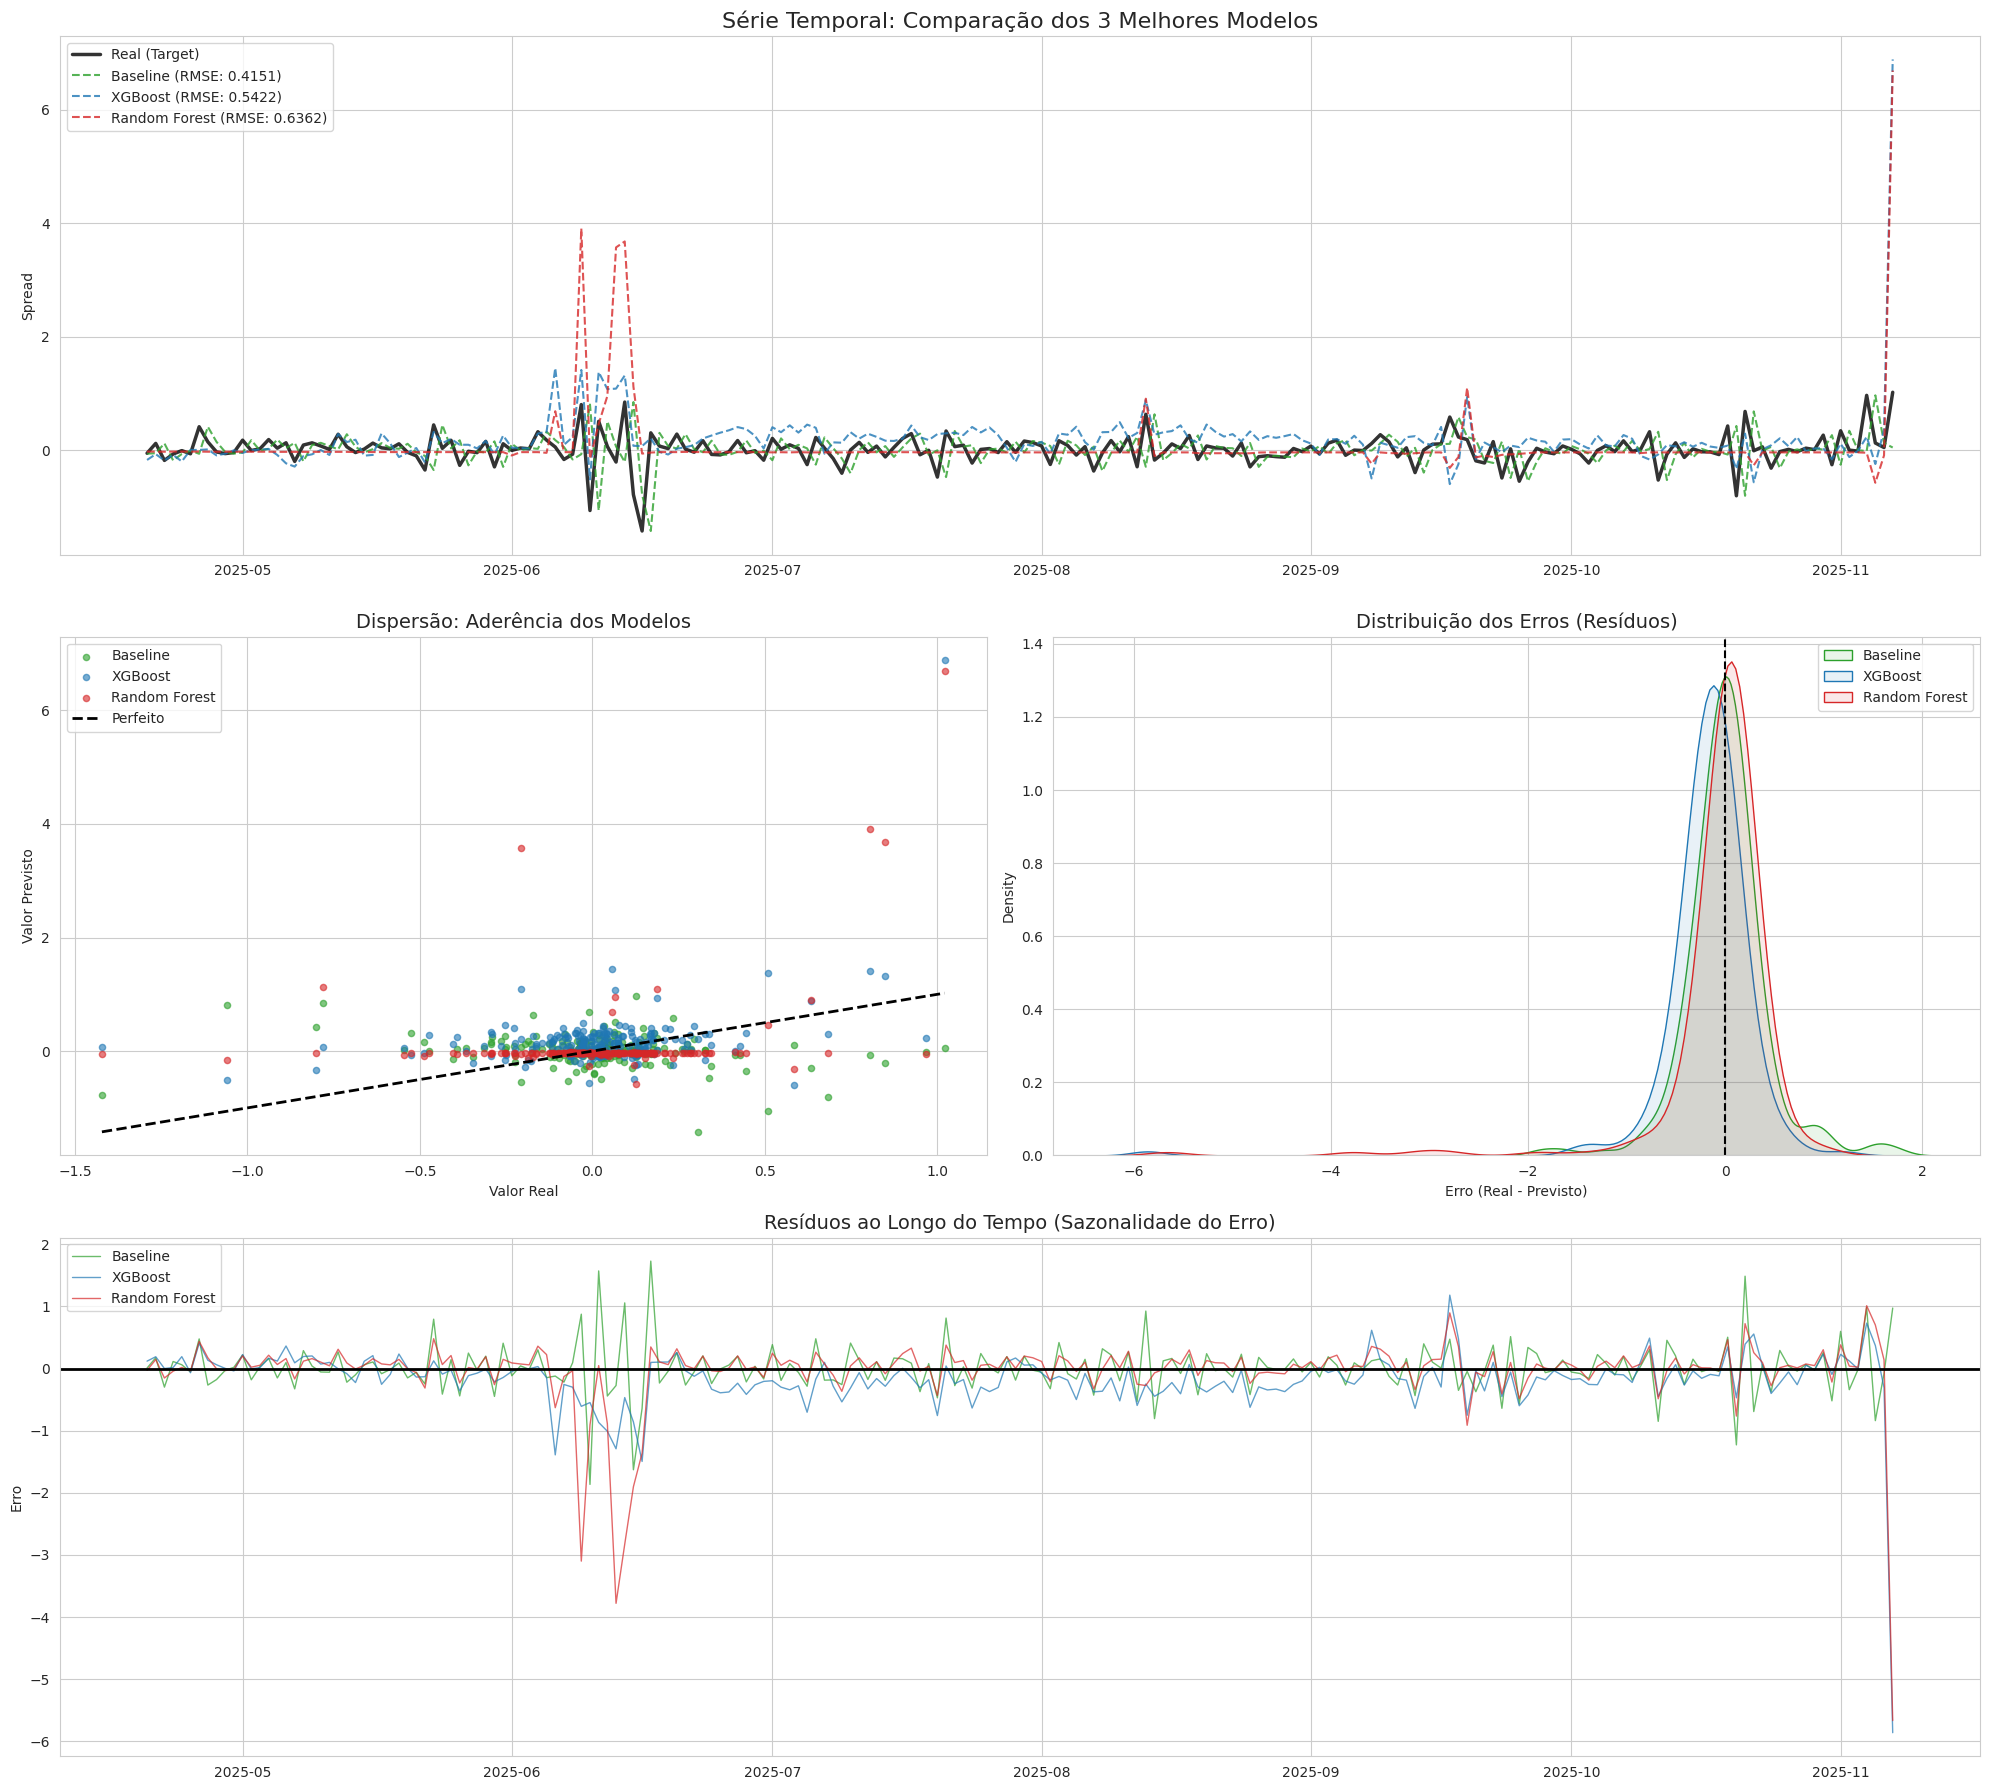

In [480]:
# ==============================================================================
# 1. CONSOLIDAÇÃO DAS PREVISÕES
# ==============================================================================
# Vamos reunir todas as previsões em um dicionário para facilitar a iteração
model_predictions = {}

# Baseline
model_predictions['Baseline'] = y_pred_baseline

# Linear Regression
try:
    model_predictions['Linear Regression'] = y_pred_lr
except NameError:
    pass # Caso não tenha sido definido

# XGBoost
try:
    model_predictions['XGBoost'] = y_pred_xgb
except NameError:
    pass

# Random Forest (adicionando o modelo anterior)
try:
    model_predictions['Random Forest'] = y_pred_rf
except NameError:
    pass

# ==============================================================================
# 2. CÁLCULO DE MÉTRICAS E RANKING
# ==============================================================================
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MedAE': medae}

# Calcular métricas para todos os modelos disponíveis
metrics_list = []
for name, preds in model_predictions.items():
    metrics_list.append(calculate_metrics(Y_test, preds, name))

# Criar DataFrame e ordenar pelo menor RMSE (o melhor modelo fica no topo)
df_metrics = pd.DataFrame(metrics_list).sort_values(by='RMSE', ascending=True)

# Selecionar os nomes dos 3 melhores modelos para plotagem
top_3_models = df_metrics.head(3)['Model'].tolist()

print("--- Ranking de Performance (Ordenado por RMSE) ---")
print(df_metrics.to_markdown(index=False))
print(f"\nTop 3 Modelos selecionados para visualização: {top_3_models}")

# ==============================================================================
# 3. VISUALIZAÇÃO COMPARATIVA (TOP 3)
# ==============================================================================
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20, 18))
colors = ['#2ca02c', '#1f77b4', '#d62728'] # Verde, Azul, Vermelho

# --- Gráfico A: Série Temporal (Real vs Previsto) ---
ax1 = plt.subplot(3, 1, 1)
ax1.plot(Y_test.index, Y_test, label='Real (Target)', color='black', linewidth=2.5, alpha=0.8)

for i, model_name in enumerate(top_3_models):
    preds = model_predictions[model_name]
    ax1.plot(Y_test.index, preds, label=f'{model_name} (RMSE: {df_metrics[df_metrics.Model==model_name].RMSE.values[0]:.4f})', 
             linestyle='--', alpha=0.8, color=colors[i])

ax1.set_title('Série Temporal: Comparação dos 3 Melhores Modelos', fontsize=16)
ax1.set_ylabel('Spread')
ax1.legend(loc='upper left')

# --- Gráfico B: Dispersão (Real vs Previsto) ---
ax2 = plt.subplot(3, 2, 3)
for i, model_name in enumerate(top_3_models):
    preds = model_predictions[model_name]
    ax2.scatter(Y_test, preds, alpha=0.6, label=model_name, color=colors[i], s=20)

# Linha de perfeição
min_val, max_val = Y_test.min(), Y_test.max()
ax2.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfeito')
ax2.set_title('Dispersão: Aderência dos Modelos', fontsize=14)
ax2.set_xlabel('Valor Real')
ax2.set_ylabel('Valor Previsto')
ax2.legend()

# --- Gráfico C: Distribuição dos Resíduos (KDE) ---
ax3 = plt.subplot(3, 2, 4)
for i, model_name in enumerate(top_3_models):
    residuals = Y_test - model_predictions[model_name]
    sns.kdeplot(residuals, label=model_name, fill=True, alpha=0.1, color=colors[i], ax=ax3)

ax3.axvline(0, color='black', linestyle='--')
ax3.set_title('Distribuição dos Erros (Resíduos)', fontsize=14)
ax3.set_xlabel('Erro (Real - Previsto)')
ax3.legend()

# --- Gráfico D: Resíduos ao Longo do Tempo ---
ax4 = plt.subplot(3, 1, 3)
for i, model_name in enumerate(top_3_models):
    residuals = Y_test - model_predictions[model_name]
    ax4.plot(Y_test.index, residuals, label=model_name, alpha=0.7, linewidth=1, color=colors[i])

ax4.axhline(0, color='black', linestyle='-', linewidth=2)
ax4.set_title('Resíduos ao Longo do Tempo (Sazonalidade do Erro)', fontsize=14)
ax4.set_ylabel('Erro')
ax4.legend()

plt.tight_layout()
plt.show()

# RNNs

In [481]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

# --- 1. PREPARAÇÃO DOS DADOS (COM ESCALONAMENTO DO Y) ---

# Normalizar o Target (Y) é CRUCIAL para LSTMs
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Fit no treino e transform no treino e teste (reshape necessário para o scaler)
y_train_scaled = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(Y_test.values.reshape(-1, 1))

# Função para criar sequências (Janelas de Tempo)
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    # Garantir arrays numpy
    X_val = X.values if hasattr(X, 'values') else X
    y_val = y if isinstance(y, np.ndarray) else y.values
    
    for i in range(len(X_val) - time_steps):
        Xs.append(X_val[i:(i + time_steps)])
        ys.append(y_val[i + time_steps]) # Target do próximo passo
    
    return np.array(Xs), np.array(ys)

# Configuração da Janela
TIME_STEPS = 30 

# Criar as sequências usando o Y ESCALONADO
X_train_lstm, y_train_lstm = create_sequences(X_train, y_train_scaled, TIME_STEPS)
X_test_lstm, y_test_lstm = create_sequences(X_test, y_test_scaled, TIME_STEPS)

print(f"Shape Entrada LSTM: {X_train_lstm.shape}") # (Amostras, Steps, Features)

Shape Entrada LSTM: (775, 30, 12)


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# --- 1. FUNÇÃO DE CONSTRUÇÃO DE MODELO (para o Tuner) ---
# O Tuner precisa de uma função que defina e compile o modelo
def build_model(hp):
    model = Sequential()
    
    # --- Hiperparâmetros para Otimizar ---
    # 1. Unidades na camada LSTM
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    # 2. Taxa de Dropout
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.4, step=0.1)
    # 3. Taxa de Aprendizado (Learning Rate)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    # ----------------------------------------
    
    model.add(LSTM(units=hp_units, 
                   return_sequences=False, 
                   input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(rate=hp_dropout))
    model.add(Dense(1)) # Camada de saída
    
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='mean_squared_error'
    )
    return model

# --- 2. CONFIGURAÇÃO DO TUNER ---
# Usaremos o 'RandomSearch'. Ele testa N combinações aleatórias.
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss', # Queremos minimizar a perda de validação
    max_trials=10,        # Número de combinações diferentes a testar
    executions_per_trial=1, # Quantas vezes treinar cada combinação
    directory='keras_tuner_dir',
    project_name='lstm_tuning'
)

# Early stopping (para o tuner)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

print("--- Iniciando Otimização (Tuning) ---")
# O tuner usará os dados de treino e separará uma parte para validação
tuner.search(X_train_lstm, y_train_lstm, 
             epochs=50, 
             validation_split=0.2, 
             callbacks=[early_stop],
             verbose=1)

# --- 3. OBTER O MELHOR MODELO ---
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model_lstm_tuned = tuner.get_best_models(num_models=1)[0]

print(f"""
--- Otimização Concluída ---
Melhores Hiperparâmetros:
Unidades (units): {best_hps.get('units')}
Dropout: {best_hps.get('dropout'):.2f}
Learning Rate: {best_hps.get('learning_rate')}
""")

# --- 4. PREVISÃO (com o melhor modelo) ---
print("Fazendo previsões com o modelo otimizado...")
pred_scaled_tuned = model_lstm_tuned.predict(X_test_lstm)

# Inverter a escala
pred_real_tuned = y_scaler.inverse_transform(pred_scaled_tuned).flatten()

# Criar a Série final
y_pred_lstm = pd.Series(pred_real_tuned, index=test_index_lstm) # Sobrescreve a previsão anterior

print("Previsão com modelo otimizado concluída.")

Reloading Tuner from keras_tuner_dir/lstm_tuning/tuner0.json
--- Iniciando Otimização (Tuning) ---


/home/renzo/Documents/GitHub/6-datathon-fgv-eesp/datathon/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/renzo/Documents/GitHub/6-datathon-fgv-eesp/datathon/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



--- Otimização Concluída ---
Melhores Hiperparâmetros:
Unidades (units): 64
Dropout: 0.20
Learning Rate: 0.01

Fazendo previsões com o modelo otimizado...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Previsão com modelo otimizado concluída.



Novas Métricas LSTM:
RMSE: 1.2350 | MAE: 0.9425


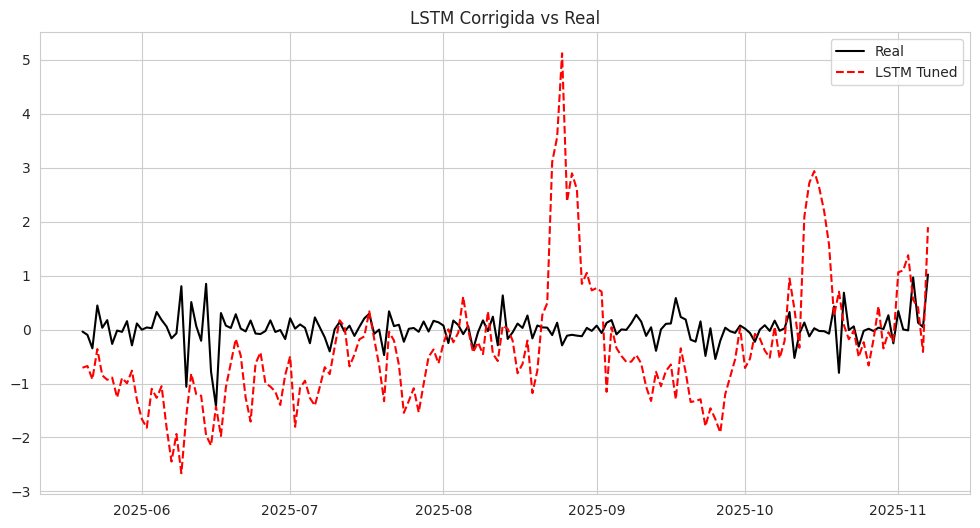

In [483]:
# ==============================================================================
# ATUALIZAÇÃO DA AVALIAÇÃO (Incluindo LSTM)
# ==============================================================================

# 1. Adicionar LSTM ao dicionário de previsões existente
# Nota: Precisamos garantir que todos tenham o mesmo tamanho para comparação justa no gráfico.
# Como o LSTM é mais curto (devido à janela de tempo), vamos alinhar os outros modelos por ele neste gráfico.

common_index = y_pred_lstm.index # Índice comum (menor)

model_predictions_final = {}



# --- 5. REAVALIAÇÃO ---
# Recalcular métricas para LSTM corrigida
metrics_lstm = calculate_metrics(Y_test.loc[test_index_lstm], y_pred_lstm, 'LSTM (Tuned)')
print(f"\nNovas Métricas LSTM:\nRMSE: {metrics_lstm['RMSE']:.4f} | MAE: {metrics_lstm['MAE']:.4f}")

# Atualizar dicionário global para o gráfico comparativo
# (Alinhando índices como feito anteriormente)
common_idx = y_pred_lstm.index
model_predictions_final['LSTM'] = y_pred_lstm # Substitui a versão anterior ruim

# Se quiser plotar rápido só para conferir
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Y_test.loc[common_idx], label='Real', color='black')
plt.plot(y_pred_lstm, label='LSTM Tuned', color='red', linestyle='--')
plt.title('LSTM Corrigida vs Real')
plt.legend()
plt.show()



--- Ranking Final de Performance (com LSTM) ---
| Model             |      MAE |     RMSE |         R2 |    MedAE |
|:------------------|---------:|---------:|-----------:|---------:|
| Baseline          | 0.294239 | 0.443534 |   -1.3769  | 0.191243 |
| XGBoost           | 0.306    | 0.583346 |   -3.11159 | 0.210898 |
| Random Forest     | 0.279887 | 0.686809 |   -4.69939 | 0.112812 |
| LSTM              | 0.942538 | 1.23499  |  -17.4281  | 0.744598 |
| Linear Regression | 6.5205   | 6.70446  | -542.106   | 6.33264  |


/tmp/ipykernel_88992/3681190276.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=df_metrics_final, palette='viridis')


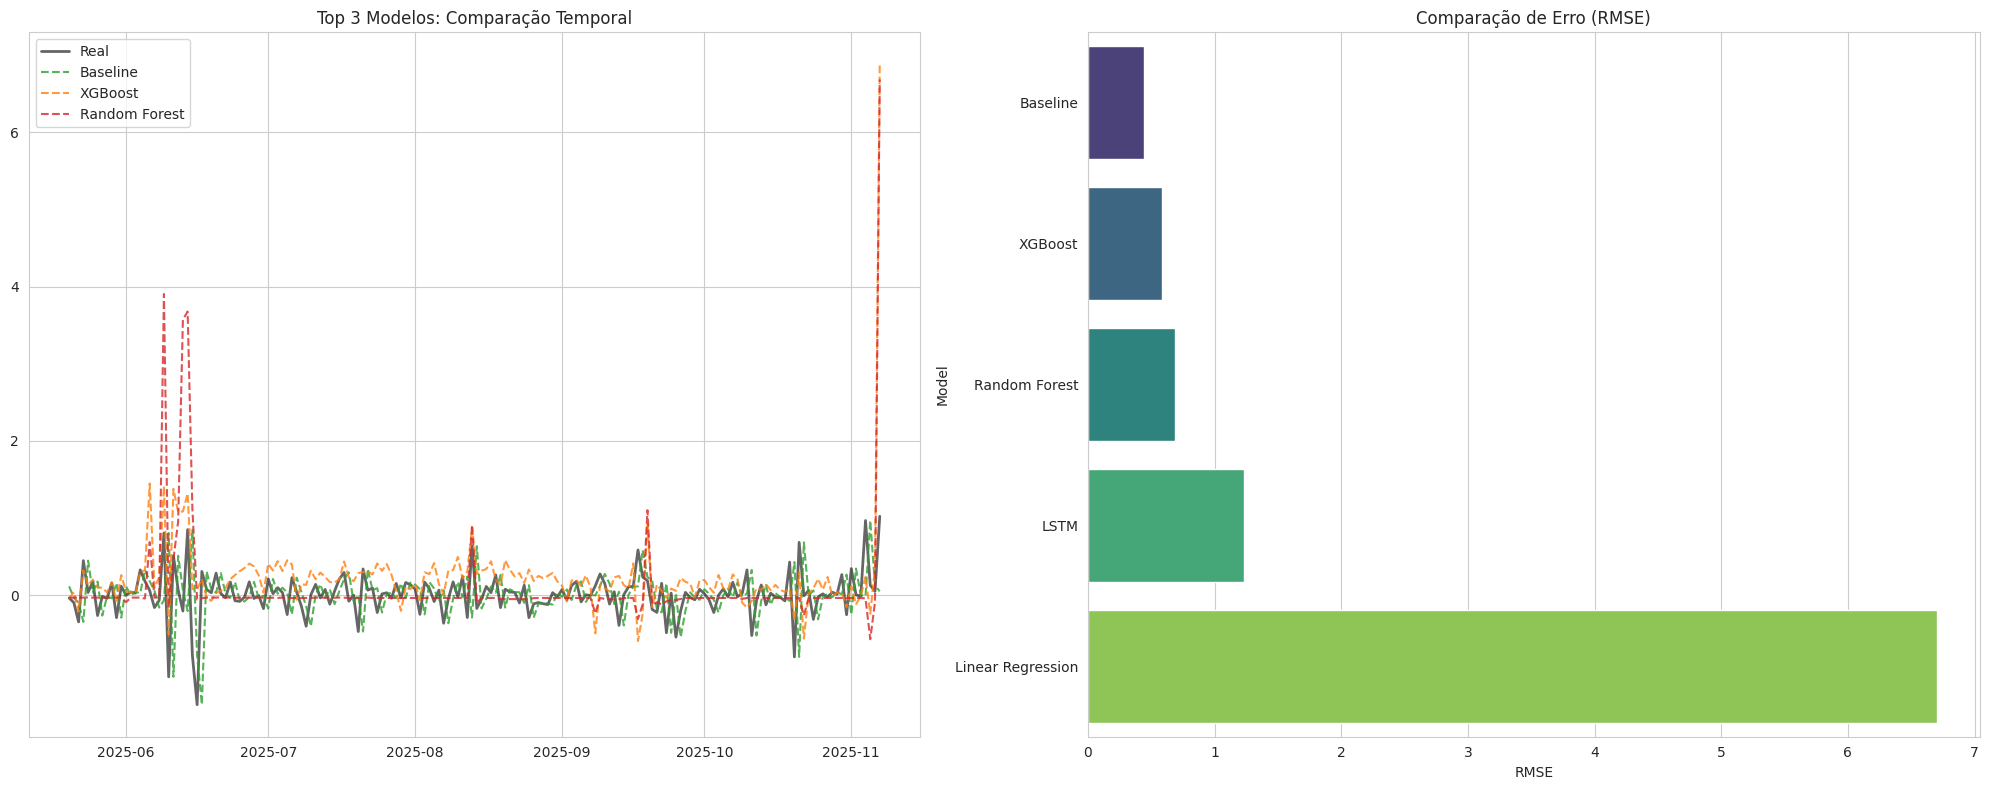

In [484]:


# Filtrar modelos anteriores para o mesmo índice da LSTM
for name, series in model_predictions.items(): # model_predictions vem da etapa anterior
    if isinstance(series, pd.Series):
        model_predictions_final[name] = series.loc[common_index]
    else:
        # Se for array numpy, converte primeiro (assumindo alinhamento original com Y_test)
        s = pd.Series(series, index=Y_test.index)
        model_predictions_final[name] = s.loc[common_index]

# Adicionar LSTM
model_predictions_final['LSTM'] = y_pred_lstm

# O target real também precisa ser cortado
Y_test_final = Y_test.loc[common_index]

# 2. Recalcular Métricas
metrics_list_final = []
for name, preds in model_predictions_final.items():
    metrics_list_final.append(calculate_metrics(Y_test_final, preds, name))

df_metrics_final = pd.DataFrame(metrics_list_final).sort_values(by='RMSE', ascending=True)
top_3_models_final = df_metrics_final.head(3)['Model'].tolist()

print("--- Ranking Final de Performance (com LSTM) ---")
print(df_metrics_final.to_markdown(index=False))

# 3. Plotagem
plt.figure(figsize=(20, 8))

# Série Temporal
plt.subplot(1, 2, 1)
plt.plot(Y_test_final.index, Y_test_final, label='Real', color='black', linewidth=2, alpha=0.6)
colors = ['#2ca02c', '#ff7f0e', '#d62728'] 

for i, model_name in enumerate(top_3_models_final):
    preds = model_predictions_final[model_name]
    plt.plot(Y_test_final.index, preds, label=model_name, linestyle='--', alpha=0.8, color=colors[i])

plt.title('Top 3 Modelos: Comparação Temporal')
plt.legend()

# Barplot de RMSE
plt.subplot(1, 2, 2)
sns.barplot(x='RMSE', y='Model', data=df_metrics_final, palette='viridis')
plt.title('Comparação de Erro (RMSE)')

plt.tight_layout()
plt.show()